In [36]:
# from qutip.cy.piqs import j_min, j_vals, m_vals, jspin
from qutip.piqs import *
import numpy as np
from itertools import product
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress
import matplotlib.pyplot as plt
from qutip import *

### N<sub>A</sub> : N<sub>B</sub>,  N/2 TLS excited in A

In [229]:
deltaE = 2.5  # Atomic transition frequency
omega = 1.0  # Field frequency
U = 0.01  # Coupling strength

time to transfer one = 154427.7213860693


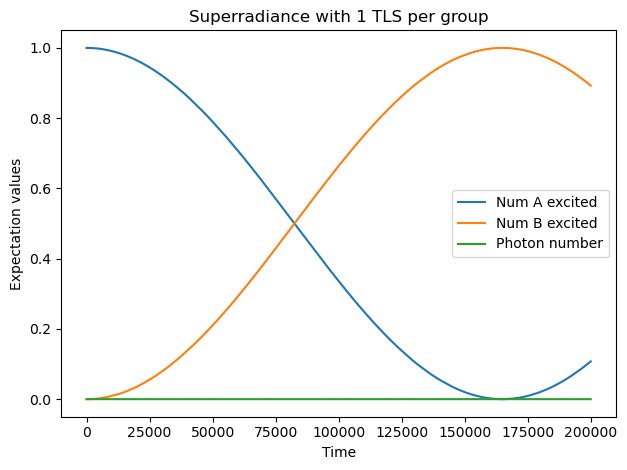

time to transfer one = 77223.86119305965


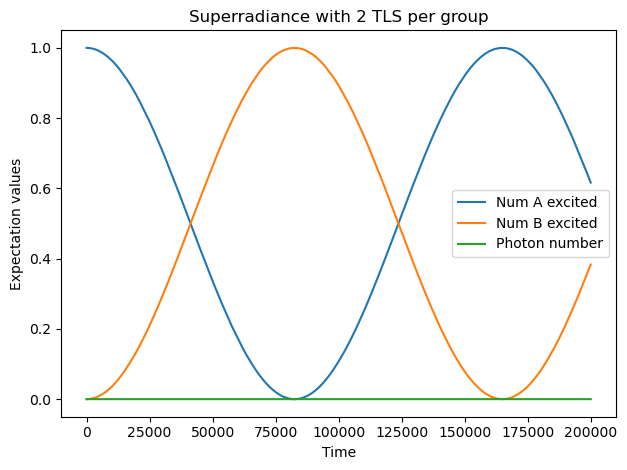

time to transfer one = 23911.19555977799


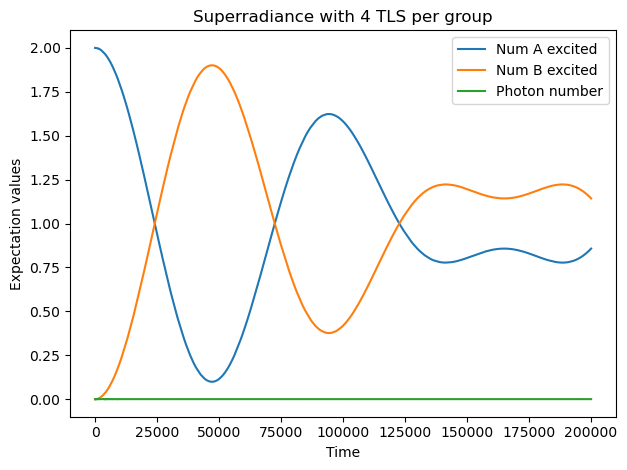

time to transfer one = 8680.434021701085


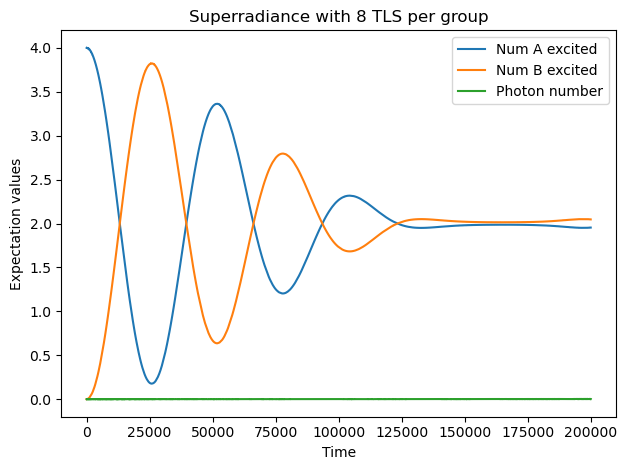

In [339]:
Ns = [1,2,4,8,16]

transfer_times = []
rates = []

for N in Ns:
    
    # Number of two-level systems (TLS)
    # N = 8
    
    # Number
    num_excited = N//2 or 1
    
    # Number bosons
    max_bosons = num_excited*2
    
    # Operators for TLS
    JA = jmat(0.5) if N==1 else jmat(N//2)
    JB = jmat(0.5) if N==1 else jmat(N//2)
    
    # Field operators
    a = destroy(max_bosons+1)  # Destruction operator for 10 Fock states
    
    # Hamiltonian
    
    a     = tensor(destroy(max_bosons+1), qeye(JA[0].dims[0][0]), qeye(JB[0].dims[0][0]))     # tensorised boson destruction operator
    JxA   = tensor(qeye(max_bosons+1), JA[0], qeye(JB[0].dims[0][0]))       # tensorised 𝜎𝑥1 operator 
    JxB   = tensor(qeye(max_bosons+1), qeye(JA[0].dims[0][0]), JB[0])       # tensorised 𝜎𝑥2 operator 
    JzA   = tensor(qeye(max_bosons+1), JA[2], qeye(JB[0].dims[0][0]))       # tensorised 𝜎z1 operator 
    JzB   = tensor(qeye(max_bosons+1), qeye(JA[0].dims[0][0]), JB[2])       # tensorised 𝜎z2 operator 
    
    
    two_state_A     =  JzA                                  # two state system energy operator   𝜎𝑧1/2
    two_state_B     =  JzB                                  # two state system energy operator   𝜎𝑧2/2
    bosons          = (a.dag()*a+0.5)                           # boson energy operator              𝑎†𝑎+1/2
    number          = a.dag()*a                                 # boson number operator              𝑎†𝑎
    interaction_A   = (a.dag() + a) * JxA                       # interaction energy operator       (𝑎†+𝑎)𝜎𝑥1  
    interaction_B   = (a.dag() + a) * JxB  
    
    # Combine the operators in the Hamiltonian so they act on the full Hilbert space
    # H_atom_A = tensor(qeye(max_bosons+1), omega_0 * jzA, qeye(jzB.dims[0][0]))
    # H_atom_B = tensor(qeye(max_bosons+1), qeye(jzA.dims[0][0]), omega_0 * jzB)
    
    # H_field = tensor(omega * (a.dag() * a + 0.5), qeye(jzA.dims[0][0]), qeye(jzB.dims[0][0]))
    # # H_interaction = g * (tensor(jx, a.dag()) + tensor(jx, a))
    # H_interaction_A = g * tensor((a.dag() + a), qeye(jzA.dims[0][0]), qeye(jzB.dims[0][0])) * tensor(qeye(max_bosons+1), jxA, )
    # H_interaction_B = g * tensor((a.dag() + a), qeye(jz.dims[0][0]))*tensor(qeye(max_bosons+1), jxB)
    
    
    possible_ns = range(0, max_bosons+1)
    possible_ms = range(N, -1,-1)
    nm_list = [(n,m1,m2) for (n,m1,m2) in product(possible_ns, possible_ms, possible_ms)]
    
    
    
    # Initial state: All atoms in excited state, field in vacuum state
    # psi_atom = basis(jz.dims[0][0], 0)  # All atoms in excited state (j = N/2, m = N/2)
    # psi_atom = basis(jz.dims[0][0], (jz.dims[0][0])//2)
    psi_atom_A = basis(JA[0].dims[0][0], N//2)
    psi_atom_B = basis(JB[0].dims[0][0], N)
    psi_field = fock(max_bosons+1, 0)  # Field in vacuum state
    psi0 = tensor(psi_field, psi_atom_A, psi_atom_B)
    
    
     
    
    H = deltaE*two_state_A + deltaE*two_state_B + bosons + U*interaction_A + U*interaction_B
    
    
    # Time list
    tlist = np.linspace(0,  200000, 20000)
    
    
    # Evolve the system
    result = mesolve(H, psi0, tlist, [], [JzA, JzB, number])

    time_to_transfer_one = tlist[np.where(np.abs((result.expect[1]+ N/2 - 1))<0.01)[0][0]]

    transfer_times.append(time_to_transfer_one)
    rates.append(2*np.pi / time_to_transfer_one)

    print(f"time to transfer one = {time_to_transfer_one}")

    
    
    plt.figure()
    
    plt.title(f"Superradiance with {N} TLS per group")
    plt.xlabel("Time")
    plt.ylabel("Expectation values")
    plt.plot(tlist, result.expect[0] + N/2, label="Num A excited")
    plt.plot(tlist, result.expect[1] + N/2, label="Num B excited")
    plt.plot(tlist, result.expect[2], label="Photon number")
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()



time to transfer one = 3150.787696924231


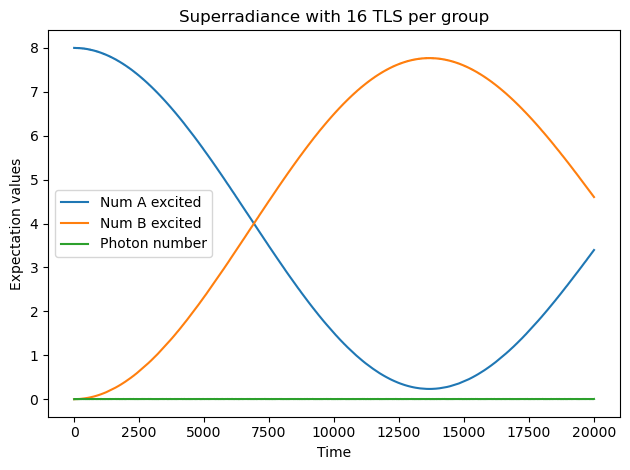

In [351]:
    print(f"time to transfer one = {time_to_transfer_one}")

    
    
    plt.figure()
    
    plt.title(f"Superradiance with {N} TLS per group")
    plt.xlabel("Time")
    plt.ylabel("Expectation values")
    plt.plot(tlist, result.expect[0] + N/2, label="Num A excited")
    plt.plot(tlist, result.expect[1] + N/2, label="Num B excited")
    plt.plot(tlist, result.expect[2], label="Photon number")
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()


In [347]:
super = pd.DataFrame(data={"N":Ns, "rate":np.multiply(rates,rates), "times":transfer_times})


In [348]:
linregress(np.log10(super["N"]), np.log10(super["rate"])).slope

2.876671680085565

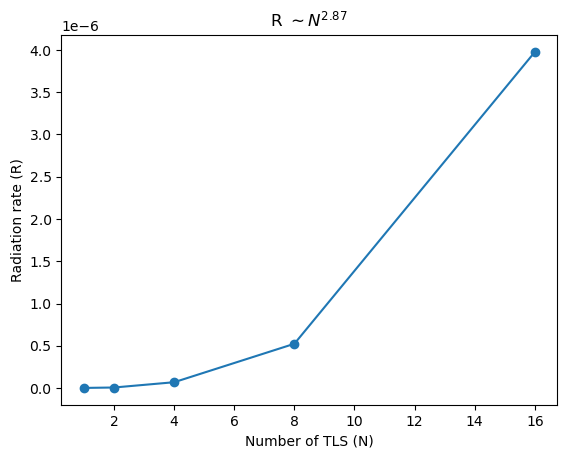

In [350]:
ax = super.plot(x="N",y="rate", title="R $\sim N^{2.87}$ ", legend=False, style='o-');
ax.set_xlabel("Number of TLS (N)");
ax.set_ylabel("Radiation rate (R)");

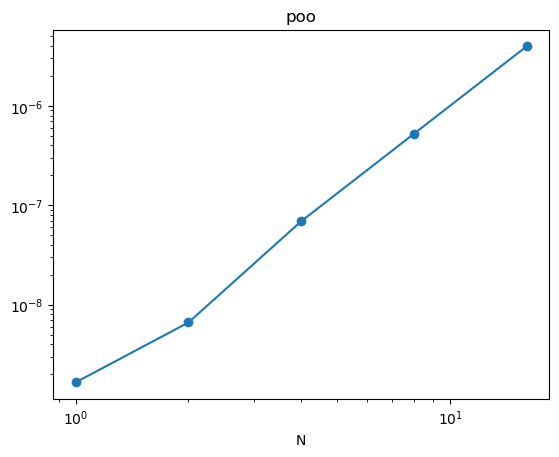

In [352]:
ax = super.plot(x="N",y="rate", logy = True,logx = True, title=f"poo", legend=False, style='o-');

### N<sub>A</sub> : N<sub>B</sub>,  1 TLS excited in A

time to first peak = 164934.12335308385


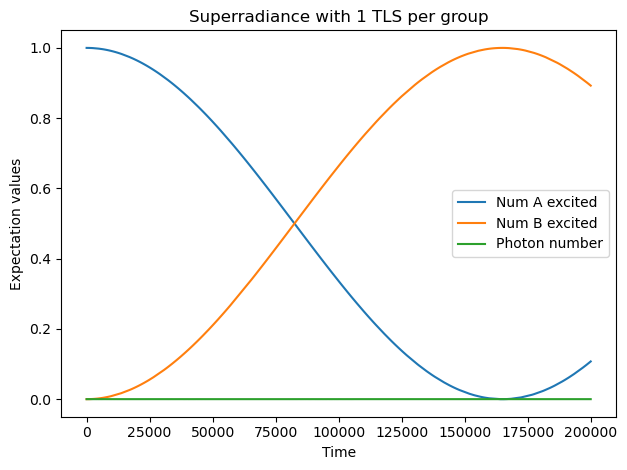

time to first peak = 82492.06230155754


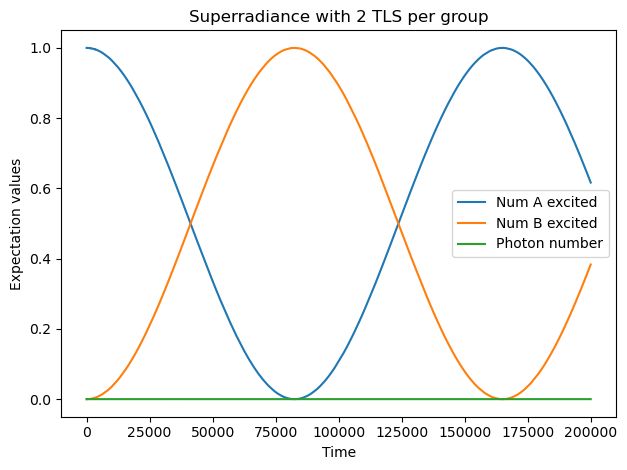

time to first peak = 41241.03102577565


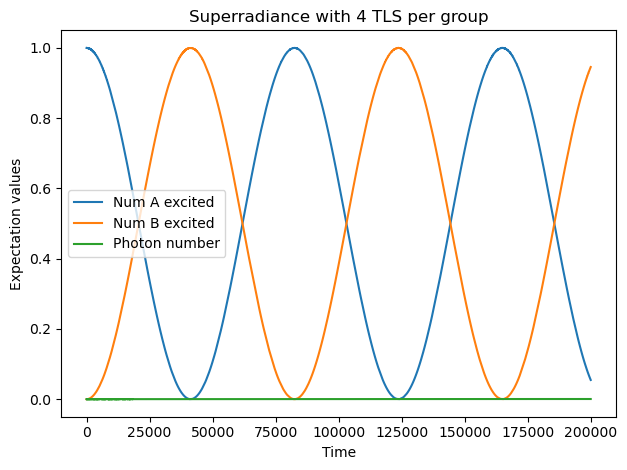

time to first peak = 20605.51513787845


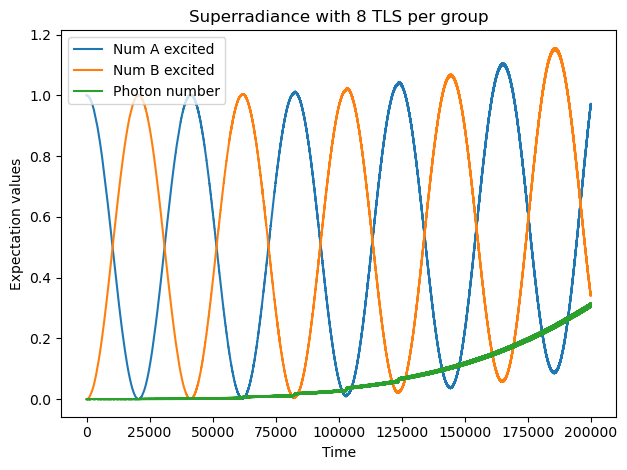

time to first peak = 10285.257131428287


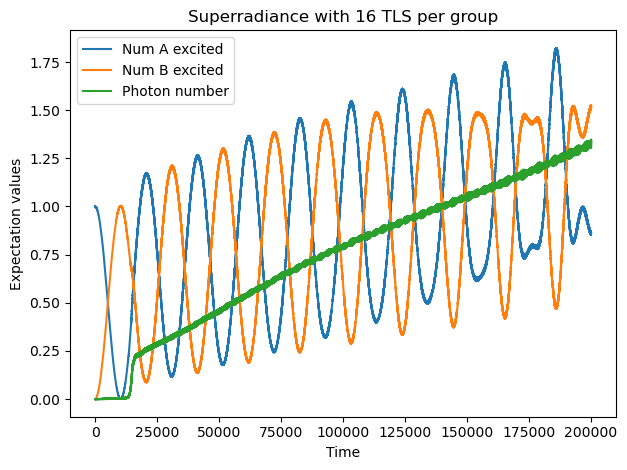

In [309]:
Ns = [1,2,4,8,16]

for N in Ns:
    
    # Number of two-level systems (TLS)
    # N = 8
    
    # Number
    num_excited =  1
    
    # Number bosons
    max_bosons = num_excited*2
    
    # Operators for TLS
    JA = jmat(0.5) if N==1 else jmat(N//2)
    JB = jmat(0.5) if N==1 else jmat(N//2)
    
    # Field operators
    a = destroy(max_bosons+1)  # Destruction operator for 10 Fock states
    
    # Hamiltonian
    
    a     = tensor(destroy(max_bosons+1), qeye(JA[0].dims[0][0]), qeye(JB[0].dims[0][0]))     # tensorised boson destruction operator
    JxA   = tensor(qeye(max_bosons+1), JA[0], qeye(JB[0].dims[0][0]))       # tensorised 𝜎𝑥1 operator 
    JxB   = tensor(qeye(max_bosons+1), qeye(JA[0].dims[0][0]), JB[0])       # tensorised 𝜎𝑥2 operator 
    JzA   = tensor(qeye(max_bosons+1), JA[2], qeye(JB[0].dims[0][0]))       # tensorised 𝜎z1 operator 
    JzB   = tensor(qeye(max_bosons+1), qeye(JA[0].dims[0][0]), JB[2])       # tensorised 𝜎z2 operator 
    
    
    two_state_A     =  JzA                                  # two state system energy operator   𝜎𝑧1/2
    two_state_B     =  JzB                                  # two state system energy operator   𝜎𝑧2/2
    bosons          = (a.dag()*a+0.5)                           # boson energy operator              𝑎†𝑎+1/2
    number          = a.dag()*a                                 # boson number operator              𝑎†𝑎
    interaction_A   = (a.dag() + a) * JxA                       # interaction energy operator       (𝑎†+𝑎)𝜎𝑥1  
    interaction_B   = (a.dag() + a) * JxB  
    
    # Combine the operators in the Hamiltonian so they act on the full Hilbert space
    # H_atom_A = tensor(qeye(max_bosons+1), omega_0 * jzA, qeye(jzB.dims[0][0]))
    # H_atom_B = tensor(qeye(max_bosons+1), qeye(jzA.dims[0][0]), omega_0 * jzB)
    
    # H_field = tensor(omega * (a.dag() * a + 0.5), qeye(jzA.dims[0][0]), qeye(jzB.dims[0][0]))
    # # H_interaction = g * (tensor(jx, a.dag()) + tensor(jx, a))
    # H_interaction_A = g * tensor((a.dag() + a), qeye(jzA.dims[0][0]), qeye(jzB.dims[0][0])) * tensor(qeye(max_bosons+1), jxA, )
    # H_interaction_B = g * tensor((a.dag() + a), qeye(jz.dims[0][0]))*tensor(qeye(max_bosons+1), jxB)
    
    
    possible_ns = range(0, max_bosons+1)
    possible_ms = range(N, -1,-1)
    nm_list = [(n,m1,m2) for (n,m1,m2) in product(possible_ns, possible_ms, possible_ms)]
    
    
    
    # Initial state: All atoms in excited state, field in vacuum state
    # psi_atom = basis(jz.dims[0][0], 0)  # All atoms in excited state (j = N/2, m = N/2)
    # psi_atom = basis(jz.dims[0][0], (jz.dims[0][0])//2)
    psi_atom_A = basis(JA[0].dims[0][0], N-1)
    psi_atom_B = basis(JB[0].dims[0][0], N)
    psi_field = fock(max_bosons+1, 0)  # Field in vacuum state
    psi0 = tensor(psi_field, psi_atom_A, psi_atom_B)
    
    
     
    
    H = deltaE*two_state_A + deltaE*two_state_B + bosons + U*interaction_A + U*interaction_B
    
    
    # Time list
    tlist = np.linspace(0,  200000, 40000)
    
    
    # Evolve the system
    result = mesolve(H, psi0, tlist, [], [JzA, JzB, number])

    print(f"time to first peak = {tlist[np.argmin((result.expect[0]))]}")
    
    
    plt.figure()
    
    plt.title(f"Superradiance with {N} TLS per group")
    plt.xlabel("Time")
    plt.ylabel("Expectation values")
    plt.plot(tlist, result.expect[0] + N/2, label="Num A excited")
    plt.plot(tlist, result.expect[1] + N/2, label="Num B excited")
    plt.plot(tlist, result.expect[2], label="Photon number")
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()



In [320]:
rates = [1/164958, 1/82474, 1/41232,  1/20611, 1/10285]
Ns = [1,2,4,8,16]
super = pd.DataFrame(data={"N":Ns, "rate":rates})


In [321]:
linregress(np.log10(super["N"]), np.log10(super["rate"])).slope

1.000749497180071

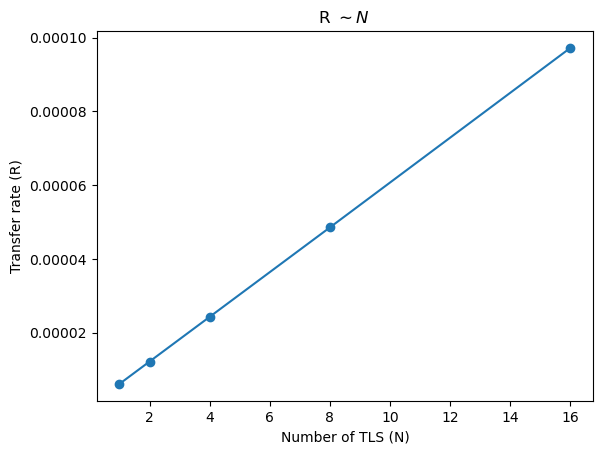

In [322]:
ax = super.plot(x="N",y="rate", title="R $\sim N^{}$ ", legend=False, style='o-');
ax.set_xlabel("Number of TLS (N)");
ax.set_ylabel("Transfer rate (R)");

### 1<sub>A</sub> : N<sub>B</sub>,  1 TLS excited in A

time to first peak = 164958.2479123956


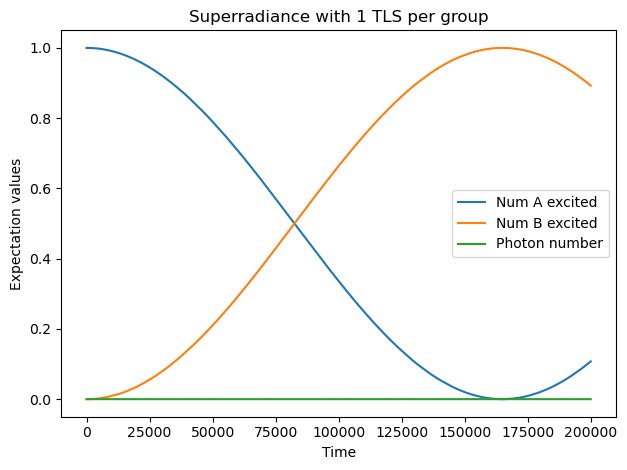

time to first peak = 109955.49777488875


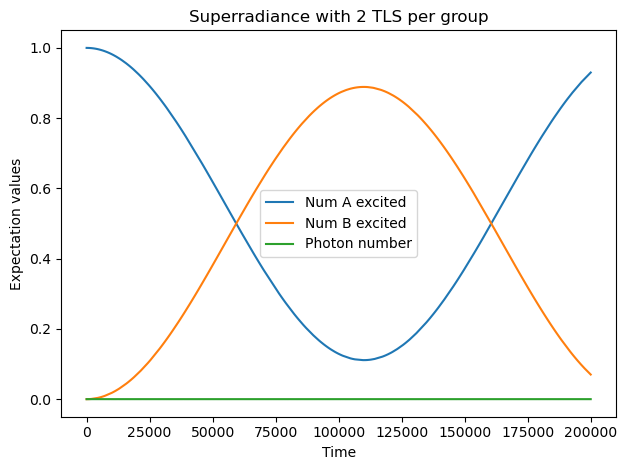

time to first peak = 197919.89599479974


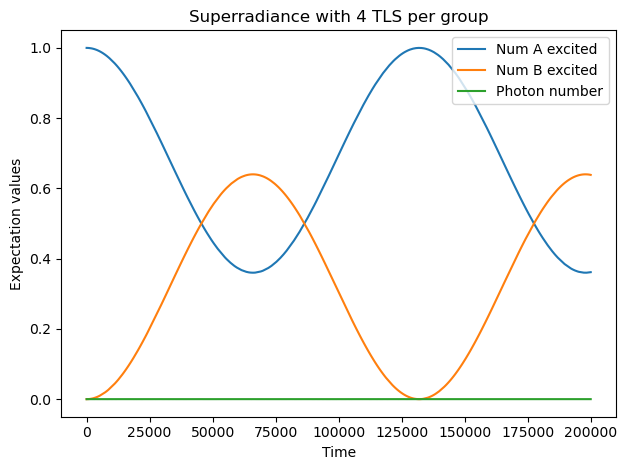

time to first peak = 183239.1619580979


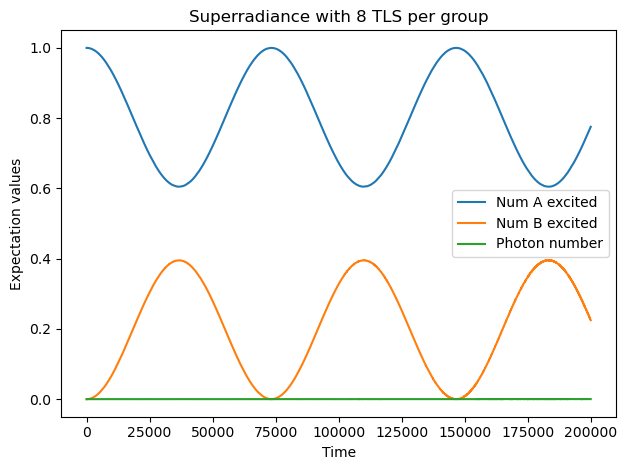

time to first peak = 149987.49937496876


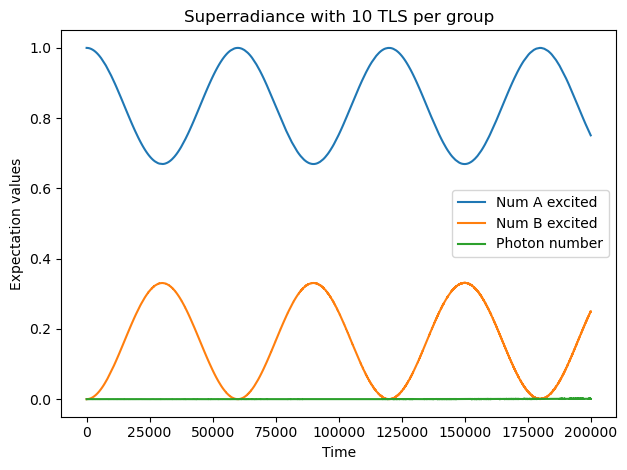

In [294]:
Ns = [1,2,4,8,10]

for N in Ns:
    
    # Number of two-level systems (TLS)
    # N = 8
    
    # Number
    num_excited =  1
    
    # Number bosons
    max_bosons = num_excited*2
    
    # Operators for TLS
    JA = jmat(0.5)
    JB = jmat(0.5) if N==1 else jmat(N//2)
    
    # Field operators
    a = destroy(max_bosons+1)  # Destruction operator for 10 Fock states
    
    # Hamiltonian
    
    a     = tensor(destroy(max_bosons+1), qeye(JA[0].dims[0][0]), qeye(JB[0].dims[0][0]))     # tensorised boson destruction operator
    JxA   = tensor(qeye(max_bosons+1), JA[0], qeye(JB[0].dims[0][0]))       # tensorised 𝜎𝑥1 operator 
    JxB   = tensor(qeye(max_bosons+1), qeye(JA[0].dims[0][0]), JB[0])       # tensorised 𝜎𝑥2 operator 
    JzA   = tensor(qeye(max_bosons+1), JA[2], qeye(JB[0].dims[0][0]))       # tensorised 𝜎z1 operator 
    JzB   = tensor(qeye(max_bosons+1), qeye(JA[0].dims[0][0]), JB[2])       # tensorised 𝜎z2 operator 
    
    
    two_state_A     =  JzA                                  # two state system energy operator   𝜎𝑧1/2
    two_state_B     =  JzB                                  # two state system energy operator   𝜎𝑧2/2
    bosons          = (a.dag()*a+0.5)                           # boson energy operator              𝑎†𝑎+1/2
    number          = a.dag()*a                                 # boson number operator              𝑎†𝑎
    interaction_A   = (a.dag() + a) * JxA                       # interaction energy operator       (𝑎†+𝑎)𝜎𝑥1  
    interaction_B   = (a.dag() + a) * JxB  
    
    # Combine the operators in the Hamiltonian so they act on the full Hilbert space
    # H_atom_A = tensor(qeye(max_bosons+1), omega_0 * jzA, qeye(jzB.dims[0][0]))
    # H_atom_B = tensor(qeye(max_bosons+1), qeye(jzA.dims[0][0]), omega_0 * jzB)
    
    # H_field = tensor(omega * (a.dag() * a + 0.5), qeye(jzA.dims[0][0]), qeye(jzB.dims[0][0]))
    # # H_interaction = g * (tensor(jx, a.dag()) + tensor(jx, a))
    # H_interaction_A = g * tensor((a.dag() + a), qeye(jzA.dims[0][0]), qeye(jzB.dims[0][0])) * tensor(qeye(max_bosons+1), jxA, )
    # H_interaction_B = g * tensor((a.dag() + a), qeye(jz.dims[0][0]))*tensor(qeye(max_bosons+1), jxB)
    
    
    possible_ns = range(0, max_bosons+1)
    possible_msB = range(N, -1,-1)
    possible_msA = range(1, -1,-1)
    nm_list = [(n,m1,m2) for (n,m1,m2) in product(possible_ns, possible_msA, possible_msB)]
    
    
    
    # Initial state: All atoms in excited state, field in vacuum state
    # psi_atom = basis(jz.dims[0][0], 0)  # All atoms in excited state (j = N/2, m = N/2)
    # psi_atom = basis(jz.dims[0][0], (jz.dims[0][0])//2)
    psi_atom_A = basis(JA[0].dims[0][0], 0)
    psi_atom_B = basis(JB[0].dims[0][0], N)
    psi_field = fock(max_bosons+1, 0)  # Field in vacuum state
    psi0 = tensor(psi_field, psi_atom_A, psi_atom_B)
    
    
     
    
    H = deltaE*two_state_A + deltaE*two_state_B + bosons + U*interaction_A + U*interaction_B
    
    
    # Time list
    tlist = np.linspace(0,  200000, 20000)
    
    
    # Evolve the system
    result = mesolve(H, psi0, tlist, [], [JzA, JzB, number])

    print(f"time to first peak = {tlist[np.argmin((result.expect[0]))]}")
    
    
    plt.figure()
    
    plt.title(f"Superradiance with {N} TLS per group")
    plt.xlabel("Time")
    plt.ylabel("Expectation values")
    plt.plot(tlist, result.expect[0] + 1/2, label="Num A excited")
    plt.plot(tlist, result.expect[1] + N/2, label="Num B excited")
    plt.plot(tlist, result.expect[2], label="Photon number")
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()



In [295]:
rates = [1/164958, 1/109955, 1/197919, 1/183239, 1/149987]

-0.0670878524928477

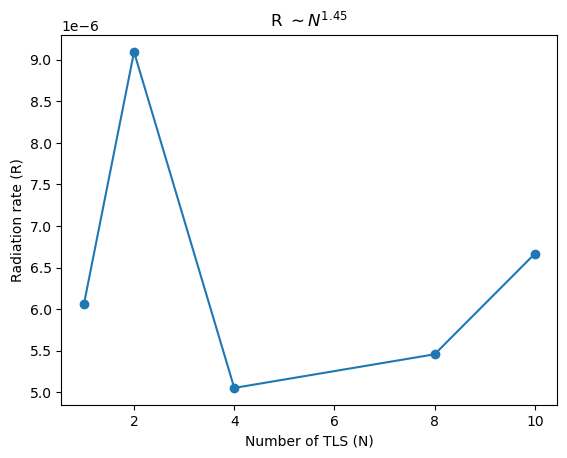